<a href="https://colab.research.google.com/github/Percy-O/Cloud-Security/blob/main/Cloud_Secuirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
# image reading
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle
from tqdm import tqdm
import scipy
from keras.models import load_model
import skimage
# model evaluation
from mlxtend.plotting import plot_confusion_matrix
from skimage.transform import resize
import random
import glob
import tensorflow

## Getting the Cloud Attack image

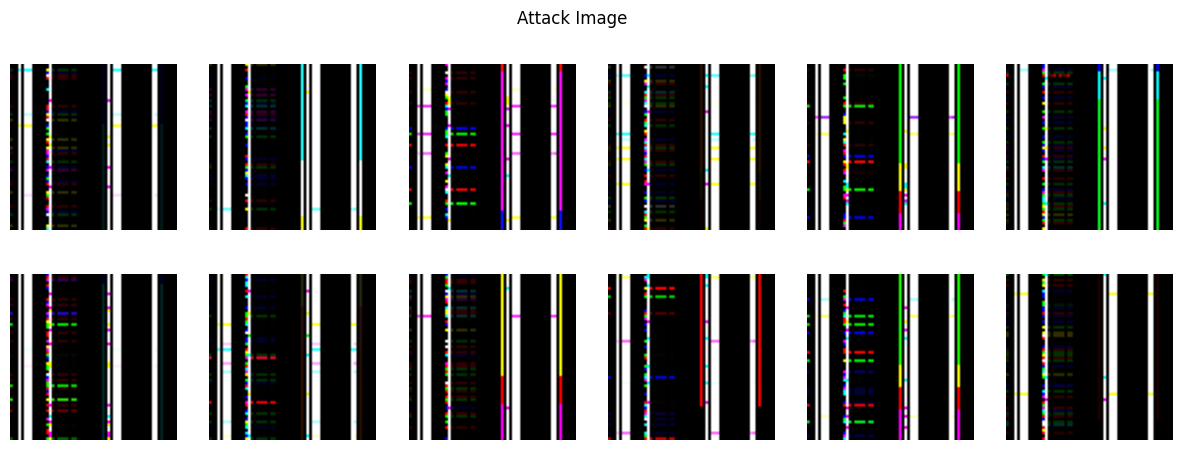

In [ ]:
# Getting cloud attack directory

ATTACK = "drive/MyDrive/cloud/Training/Attack"

get_attack_image = random.sample(glob.glob(f"{ATTACK}/*.png"), 12)

f,ax = plt.subplots(2,6,figsize=(15,5))

for i in range(0,12):
  im = cv2.imread(get_attack_image[i])
  ax[i//6,i%6].imshow(im)
  ax[i//6,i%6].axis('off')
f.suptitle('Attack Image')
plt.show()



## Getting the Cloud Normal Image

['drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (1845).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (1848).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2474).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2441).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2455).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2500).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2442).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2480).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (1776).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (1847).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2454).png', 'drive/MyDrive/cloud/Training/Normal/9_Benign_0_normal (2481).png']


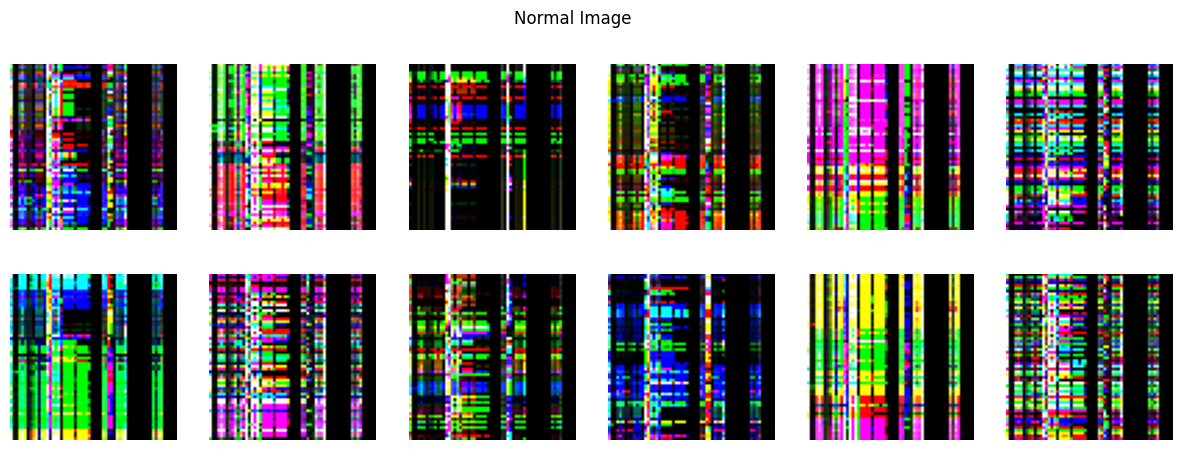

In [ ]:
# Getting cloud normal directory
NORMAL = "drive/MyDrive/cloud/Training/Normal"

get_normal_image = random.sample(glob.glob(f"{NORMAL}/*.png"), 12)
print(get_normal_image)
f,ax = plt.subplots(2,6,figsize=(15,5))

for i in range(0,12):
  im = cv2.imread(get_normal_image[i])
  ax[i//6,i%6].imshow(im)
  ax[i//6,i%6].axis('off')
f.suptitle('Normal Image')
plt.show()



## Reduce the image size for processing

In [ ]:
Xval=[]
Yval=[]
Attack=os.listdir(f"{ATTACK}/")
for a in Attack:
  # print(a)
    try:
        image=cv2.imread(f"{ATTACK}/{a}")
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        Xval.append(np.array(size_image))
        Yval.append(0)# Passing 0 as Attack into Yval
    except AttributeError:
        print("")

Normal=os.listdir(f"{NORMAL}/")
for b in Normal:
    try:
        image=cv2.imread(f"{NORMAL}/{b}")
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        Xval.append(np.array(size_image))
        Yval.append(1)# Passing 1 as Normal into Yval
    except AttributeError:
        print("")


## Save the resized image as X and the generated Y value


In [ ]:

X=np.array(Xval)
Y=np.array(Yval)

np.save("Xval",X)
np.save("Yval",Y)

## Load Saved Data Xval and Yval

In [ ]:
X=np.load("Xval.npy")
Y=np.load("Yval.npy")

s=np.arange(X.shape[0])
np.random.shuffle(s)
Xval=X[s]
Yval=Y[s]

In [ ]:
num_classes=len(np.unique(Yval))
len_data=len(Xval)

## Splitting Data

In [ ]:
(x_train,x_test)=Xval[(int)(0.1*len_data):],Xval[:(int)(0.1*len_data)]
(y_train,y_test)=Yval[(int)(0.1*len_data):],Yval[:(int)(0.1*len_data)]

## Normalization

In [ ]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
#Doing One hot encoding as classifier has multiple classes
y_train=tensorflow.keras.utils.to_categorical(y_train,num_classes)
y_test=tensorflow.keras.utils.to_categorical(y_test,num_classes)

## Creating CNN Model

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(np.array(x_train),y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),
                  epochs=20,verbose=1)

Epoch 1/20
6/6 [==============================] - 2s 129ms/step - loss: 0.3376 - accuracy: 0.7889 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 2/20
6/6 [==============================] - 1s 86ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 1.5741e-04 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 0s 83ms/step - loss: 3.1457e-04 - accuracy: 1.0000 - val_loss: 1.3389e-04 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 0s 75ms/step - loss: 3.2273e-04 - accuracy: 1.0000 - val_loss: 1.6382e-04 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 0s 82ms/step - loss: 2.8958e-04 - accuracy: 1.0000 - val_loss: 6.7929e-05 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 0s 81ms/step - loss: 8.8013e-05 - accuracy: 1.0000 - val_loss: 1.7505e-05 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 0s 83ms/step - loss: 3.8106e-05 - accuracy: 1.0000 - val_loss: 3.9219e-06 - val

## Check Accuracy

In [ ]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

1/1 [==============================] - 0s 42ms/step - loss: 1.0133e-07 - accuracy: 1.0000

 Test_Accuracy:- 1.0


## CNN Performance Visualization

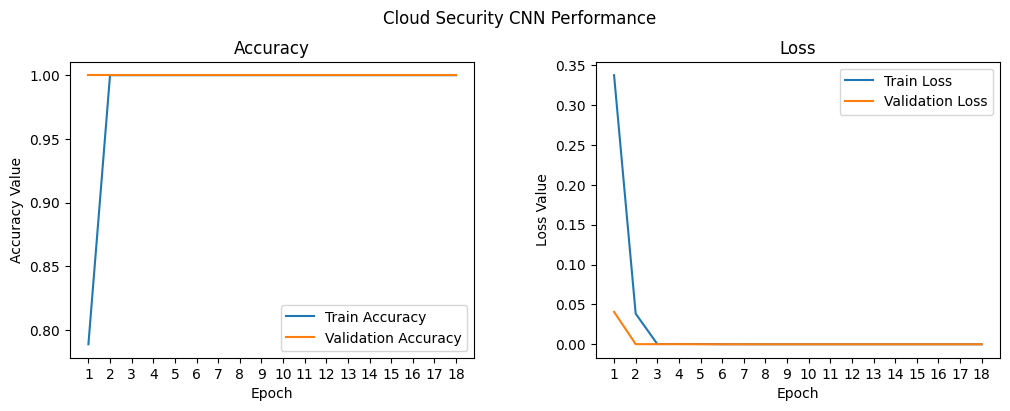

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Cloud Security CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch,1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Confusion Matrix Metrics

1/1 [==============================] - 0s 133ms/step


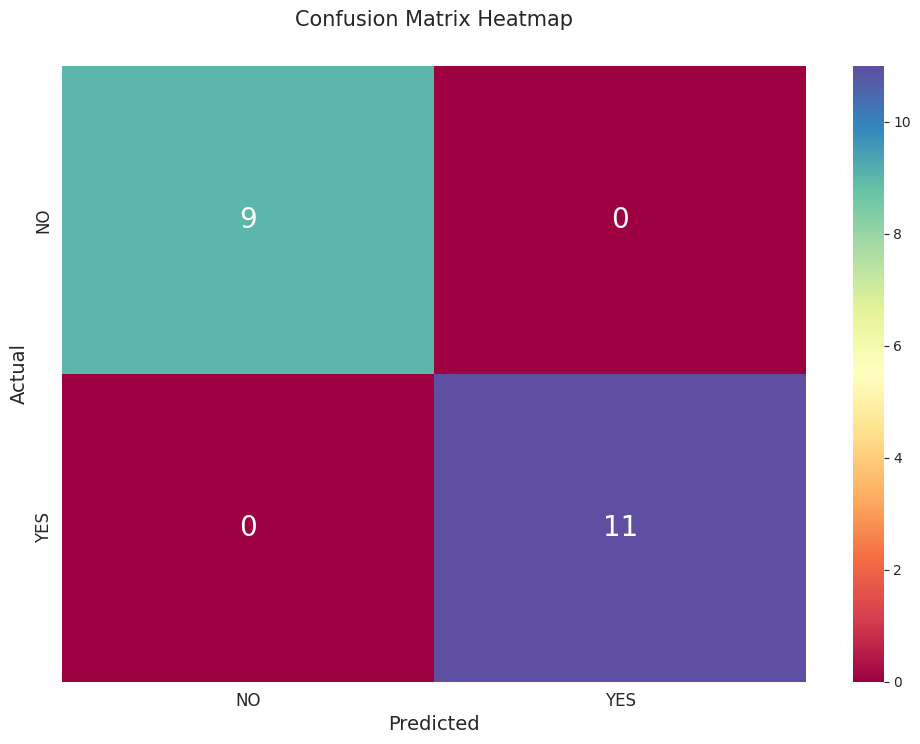

-Acuracy achieved: 100.00%
-Accuracy by model was: 100.00%
-Accuracy by validation was: 100.00%


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = np.argmax(y_test,axis=1)
Y_Pred = model.predict(x_test)
Y_pred = np.argmax(Y_Pred,axis=1)

conf_mat = confusion_matrix(y_test,Y_pred)
sns.set_style(style='white')
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap\n', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(['NO','YES'], fontdict={'fontsize':12})
heatmap.set_yticklabels(['NO','YES'], fontdict={'fontsize':12})
plt.show()
print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

## Save Model

In [ ]:
model.save('cloud.h5')

## Prediction

1/1 [==============================] - 0s 23ms/step


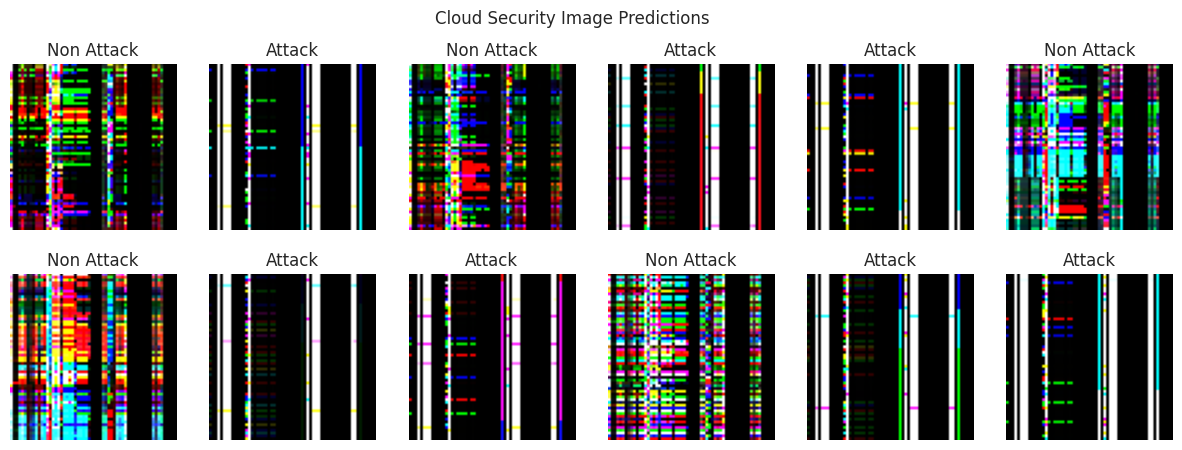

In [ ]:
from keras.models import load_model
from tensorflow.keras import utils
import numpy as np

# Load the saved model
model = load_model('cloud.h5')

import glob

ATTACK = "drive/MyDrive/cloud/Training/Attack"

NORMAL =  "drive/MyDrive/cloud/Training/Normal"

sample_normal = random.sample(glob.glob(f"{ATTACK}/*.png") + glob.glob(f"{NORMAL}/*.png"), 12)
# sample_normal =

f,ax = plt.subplots(2,6,figsize=(15,5))
# Load an example image to predict
for i in range(0, 12):
    img_path = sample_normal[i]
    img = utils.load_img(img_path, target_size=(50, 50))
    x = utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # Normalize the image data
    x /= 255.0
    # Predict the class of the example image using the loaded model
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions)
    # Load the image and plot it with the correct title
    im = cv2.imread(img_path)
    if predicted_class == 1:
        ax[i//6, i%6].imshow(im)
        ax[i//6, i%6].set_title('Non Attack')
    else:
        ax[i//6, i%6].imshow(im)
        ax[i//6, i%6].set_title('Attack')
    ax[i//6, i%6].axis('off')

f.suptitle('Cloud Security Image Predictions')
plt.show()